<a href="https://colab.research.google.com/github/ManjaxX/Temas2023/blob/main/MCM0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Montecarlo de Acierto y Error
Función de densidad de N(μ,σ):
$$f(x)=\frac{1}{σ\sqrt{2π}}e^{-\frac{1}{2}\left(\frac{x-μ}{σ}\right)^2}$$
$σ$-desviación estándar \\
$μ$-media



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return (1/(2.0*np.sqrt(2*np.pi)))*(np.e**((-1/2.0)*((x-10)/2.0)**2))

(0.0, 20.0, 0.0, 0.3)

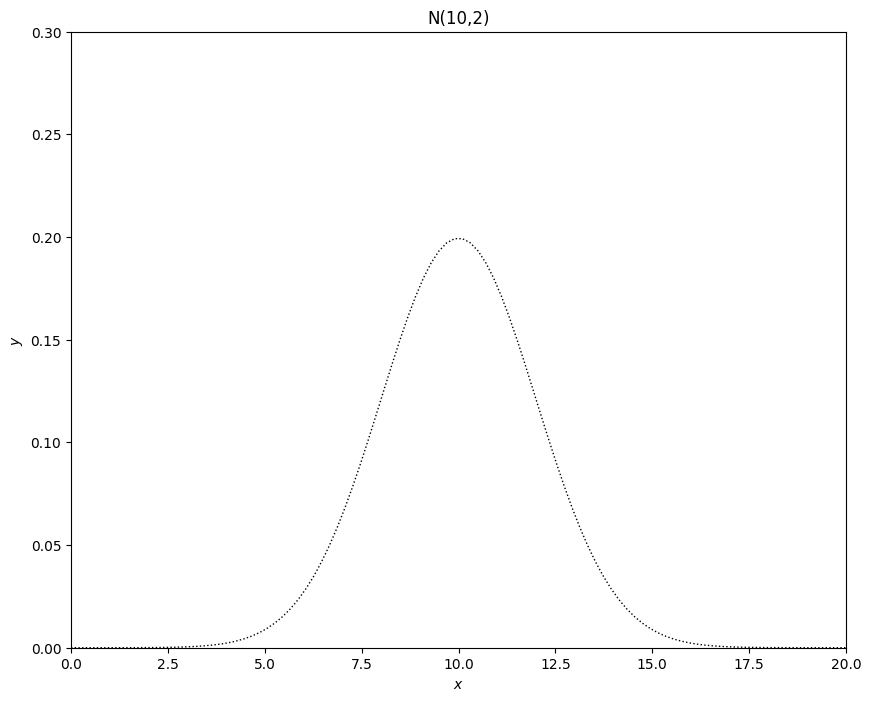

In [ ]:
x = np.linspace(0, 20, 100)
y = np.linspace(0, 10, 100)
plt.figure(figsize=(10,8))
plt.plot(x, f(x), 'k:', linewidth=1)
plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("N(10,2)")
plt.axis([0.0,20.0,0.0,0.3])

Consideraremos la siguiente región rectangular:
$${\{0\leq x\leq 20\}}\times\{{0\leq f(x)\leq 0.30\}}$$

Y sobre ella generemos puntos aleatoreamente.



In [ ]:
import random
import array as arr
cc=arr.array('f' , [])
for i in range(10000):
    x = 20*random.random()
    y = 0.3*random.random()
    cc.append(x)
    cc.append(y)
print(cc)
len(cc)

array('f', [3.724900484085083, 0.2141379565000534, 5.40372371673584, 0.2013225257396698, 7.41853141784668, 0.20474906265735626, 4.983722686767578, 0.25228163599967957, 17.26420783996582, 0.11753488332033157, 15.673657417297363, 0.06763774156570435, 11.161711692810059, 0.15241526067256927, 7.331366062164307, 0.22436685860157013, 16.910369873046875, 0.1736905425786972, 15.092674255371094, 0.2683727443218231, 13.26823902130127, 0.08295681327581406, 9.587671279907227, 0.28023284673690796, 14.497251510620117, 0.1086927205324173, 11.873821258544922, 0.20272864401340485, 17.609102249145508, 0.21506564319133759, 14.042557716369629, 0.022332198917865753, 1.3733614683151245, 0.10381773859262466, 9.026034355163574, 0.037023670971393585, 2.4603703022003174, 0.014983688481152058, 11.564203262329102, 0.018811875954270363, 13.823185920715332, 0.27865639328956604, 18.46714210510254, 0.2539673447608948, 6.05963134765625, 0.2346082478761673, 0.1688825786113739, 0.2689688503742218, 3.288893222808838, 0.2

20000

(0.0, 20.0, 0.0, 0.3)

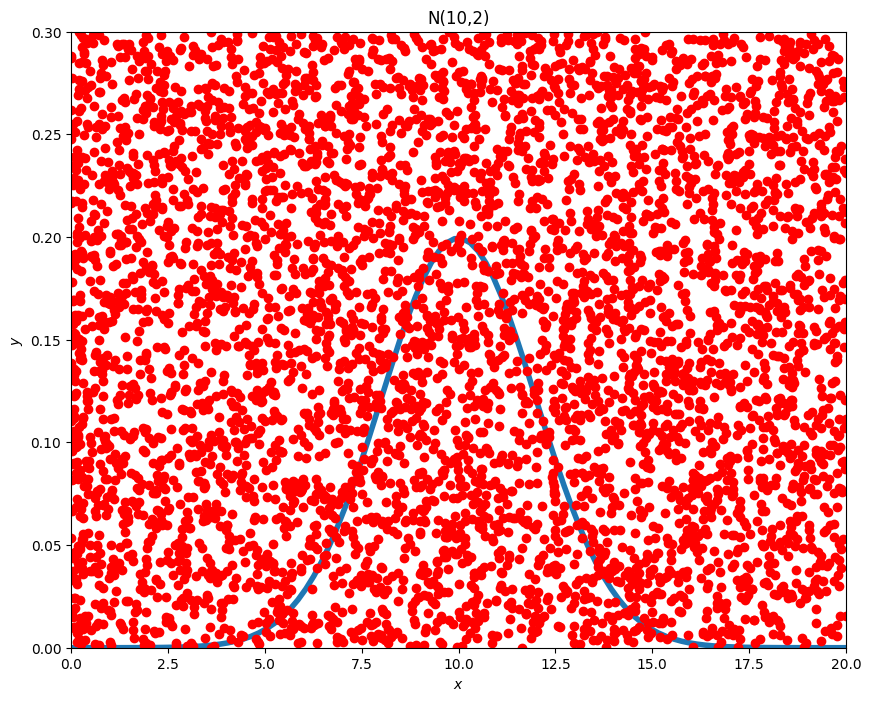

In [ ]:
x = np.linspace(0, 20, 100)
y = np.linspace(0, 10, 100)
plt.figure(figsize=(10,8))
plt.plot(x, f(x), linewidth=4)

for i in range(9999):
    plt.plot(cc[i],cc[i+1],'ro')
plt.xlabel('$x$'); plt.ylabel('$y$');
plt.title("N(10,2)")
plt.axis([0.0,20.0,0.0,0.3])

La probabilidad de que un punto aleatorio de un rectángulo dado se encuentre por debajo de una función es:
$$p=\frac{\int_{a}^{b}f(x)}{c(b-a)}$$
y en nuestro caso específico:
$$p=\frac{\int_{0.0}^{20.0}f(x)}{0.3(20.0-0.0)}$$
donde $c=0.30$ es una cota de la función.

El parámetro $p$ se puede estimar como el número de puntos debajo o en la curva de la función entre el número total de puntos del rectángulo:
$$\hat{p}=\frac{n_f}{n_t}$$
y entonces una aproximación a la integral es:
$$\int_{a}^{b}f(x)\approx \frac{n_f}{n_t}c(b-a)$$
que para nosotros:
$$\int_{0.0}^{20.0}f(x)\approx 0.30\frac{n_f}{n_t}(20.0-0.0)$$

In [ ]:
nb=arr.array('f' , []);
for i in range(19999):
  if (cc[i+1]<=f(cc[i])):
    nb.append(cc[i])
    nb.append(cc[i+1])

nf=len(nb)/2; nt=len(cc)/2;
print('nf=',nf)
print('nt=',nt)
p=nf/nt
I=0.30*p*20.0
print('I=', I)

nf= 1674.0
nt= 10000.0
I= 1.0044


Este es el valor esperado, pues el área bajo la curva de una distribución de probabilidad debe ser exactamente 1. \\
Digamos que se quiere encontrar la siguiente probabilidad $P(13\leq X)$ en dicha distribución, entonces:
$$\int_{13.0}^{20.0}f(x)\approx 0.30\frac{n_{f_{13}}}{n_{t_{13}}}(20.0-13.0)$$
donde ahora tenemos que contar el número de puntos restringidos al rectángulo delimitado por $13.0\leq x \leq 20.0$.

In [ ]:
nfarr=arr.array('f' , []);
ntarr=arr.array('f' , []);
for i in range(9999):
  if (cc[i]>=13.0):
    ntarr.append(cc[i])
    ntarr.append(cc[i+1])
    if (cc[i+1]<=f(cc[i])):
      nfarr.append(cc[i])
      nfarr.append(cc[i+1])

nf13=len(nfarr)/2; nt13=len(ntarr)/2;
print('nf13=',nf13)
print('nt13=',nt13)
p=nf13/nt13
I=0.30*p*(20.0-13.0)
print('I=', I)

nf13= 57.0
nt13= 1779.0
I= 0.06728499156829679


Encontramos que $P(13\leq X)=0.067$ lo cual concuerda con los valores registrados de la distribución $N(10,2)$.